In [1]:
import keras
from keras import layers

input = keras.Input(shape=(784,))

encoded = layers.Dense(32, activation='relu')(input) # encoded representation of the input
encoder = keras.Model(input, encoded) # maps an input to its encoded representation

decoded = layers.Dense(784, activation='sigmoid')(encoded) # lossy reconstruction of the input
autoencoder = keras.Model(input, decoded) # maps an input to its reconstruction

encoded_input = keras.Input(shape=(32,))

decoder_layer = autoencoder.layers[-1] # retrieve the last layer of the autoencoder model

decoder = keras.Model(encoded_input, decoder_layer(encoded_input)) # create the decoder model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2778 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1707 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1435 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1276 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1174 - val_loss: 0.1120
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1016 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0973 - val_loss: 0.0953

In [4]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


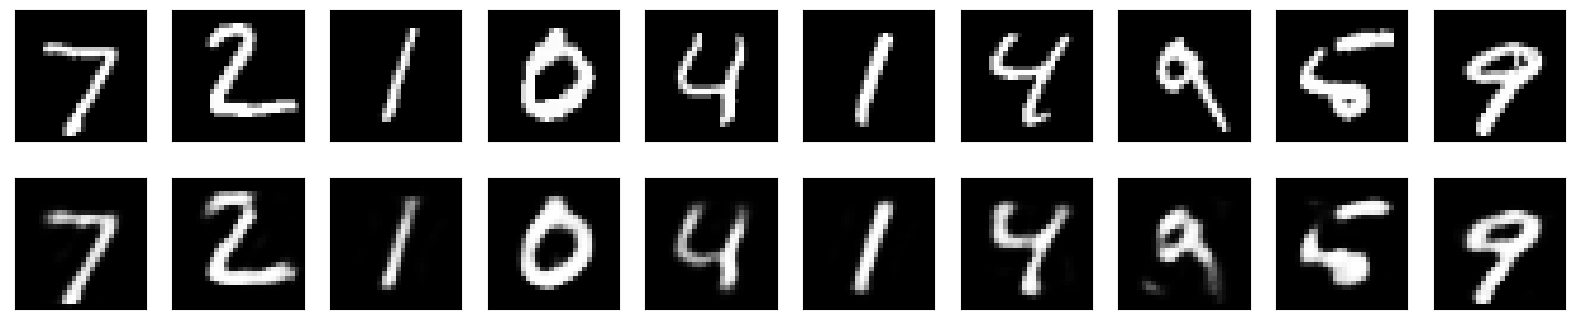

In [5]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()